# Frozen lake : Reinforcement Learning
![ Frozen lake](images/frozen_lake.gif) 

For the first part of the project we will tackle the frozen lake Envirement which involves crossing a frozen lake from the start position to a predetermined goal without falling into any holes. The solution isn't deterministic as the player can slip on the ice.
 
## Envirement description : 

### 1. Action Space
The action shape is as follows : 
- 0: Move left
- 1: Move down
- 2: Move right
- 3: Move up

### 2. Observation Space
The observation is a value representing the player’s current position= and it ranges from 0 to the map's width*height-1.

### 3. Starting State
The episode starts with the player in state [0] at the location [0, 0] in the map.

### 4. Rewards : 
Reward can be defined as follows : 
- Reach goal: +1
- Reach hole: 0
- Reach frozen: 0

### 5. Episode End : 
The episode ends if the following happens:
- Termination:
    - The player moves into a hole.
    - The player reaches the goal at max(width) * max(height) - 1 (location [width-1, height-1]).
- Truncation :
    - The length of the episode is 100 for 4x4 environment, 200 for 8x8 environment.


Uploading the necessary libraries and modules needed for our experiment.

In [1]:
import gymnasium as gym
import pygame
import sys
import argparse
from tools.qlearning import *
import numpy as np
import matplotlib.pyplot   as plt

In [2]:
# To speed up the process we will set the render_mode as None.
env = gym.make("FrozenLake-v1", is_slippery=True, render_mode=None)
observation, info = env.reset(seed=42)
num_actions = env.action_space.n
num_states = env.observation_space.n

## 1. Q-Learning
### 1.1 Q-Learning

In [15]:
import numpy as np
from tqdm import *
def q_train(env, alpha=0.99, gamma=0.8, max_n_steps=100, n_episodes=30000, weights="data/q_table.npy"):
    """ Q-learning algorithm 
    
    """
    num_actions = env.action_space.n
    num_states = env.observation_space.n
    
    try :
        print("Loading Q-table saved weights...")
        q_table = np.load(weights)

    except :
        print("Error loading Q-table saved weights")
        print("Initiating new Q-table...")
        q_table = np.zeros((num_states, num_actions))

    rewards = []

    print("Starting Q-learning algorithm...")
    for _ in trange(n_episodes):
        s = env.reset()[0]
        total_reward = 0
        for i in range(max_n_steps):   
            a = np.argmax(q_table[s]) # Select action a given s (state) following policy derived from q;
            
            s_new, r, done, _ , _= env.step(a) # Take action a and observe the reward and next state s_new and reward r
            
            # Update Q-table
            q_table[s, a] = (1-alpha)*q_table[s, a] + alpha*(r + gamma*np.max(q_table[s_new]))
            
            # update state and total reward
            s, total_reward = s_new, total_reward+r

            # if s is a terminal state then go to next episode;
            if done: 
                rewards.append(total_reward) 
                break
            
    env.close()
    print("Finished Q-learning algorithm.")
    print("Average reward is : {}".format(np.mean(rewards)))

    return q_table



In [17]:
q_table = q_train(env, weights="None")

Loading Q-table saved weights...
Error loading Q-table saved weights
Initiating new Q-table...
Starting Q-learning algorithm...


100%|██████████| 30000/30000 [00:15<00:00, 1928.79it/s]

Finished Q-learning algorithm.
Average reward is : 0.0


### 1.1 Q-Learning ( $\epsilon-greedy$ )

In [6]:
def q_train_greedy(env, alpha=0.99, gamma=0.8, epsilon=0.01, max_n_steps=100, n_episodes=30000, weights="data/q_table.npy"):
    """ Q-learning algorithm (epsilon-greedy)
    
    """
    num_actions = env.action_space.n
    num_states = env.observation_space.n
    
    try :
        print("Loading Q-table saved weights...")
        q_table = np.load(weights)

    except :
        print("Error loading Q-table saved weights")
        print("Initiating new Q-table...")
        q_table = np.zeros((num_states, num_actions))

    rewards = []

    print("Starting Q-learning algorithm...")
    for _ in trange(n_episodes):
        s = env.reset()[0]
        total_reward = 0
        for i in range(max_n_steps):
            U = np.random.uniform(0, 1)
            if U < epsilon:
                a = env.action_space.sample() # selecting action a at random from A 
            else:
                a = np.argmax(q_table[s]) # Select action a given s (state) following policy derived from q;
            
            s_new, r, done, _ , _= env.step(a)
            
            # Update Q-table
            q_table[s, a] = (1-alpha)*q_table[s, a] + alpha*(r + gamma*np.max(q_table[s_new]))
            
            # update state and total reward
            s, total_reward = s_new, total_reward+r

            # if s is a terminal state then go to next episode;
            if done: 
                rewards.append(total_reward) 
                break
            
    env.close()
    print("Finished Q-learning algorithm.")
    print("Average reward is : {}".format(np.mean(rewards)))
    return q_table

In [18]:
q_table_greedy = q_train_greedy(env,weights="None")

Loading Q-table saved weights...
Error loading Q-table saved weights
Initiating new Q-table...
Starting Q-learning algorithm...


100%|██████████| 30000/30000 [00:17<00:00, 1754.51it/s]

Finished Q-learning algorithm.
Average reward is : 0.0


Then we'll define a play function for our game to test the performance

In [9]:
def agent_play(env,q_table, max_n_episodes=30000, max_steps=100):
    count = 0
    rewards = []
    num_steps = []
    for _ in trange(max_n_episodes):
        s = env.reset()[0]
        total_reward = 0
        for i in range(max_steps):
            a = np.argmax(q_table[s, :])
            s, r, done, _,_ = env.step(a)
            total_reward+=r
            if done: 
                rewards.append(total_reward)
                num_steps.append(i+1)
                count+=1
                break
    success_rate = np.mean(rewards)
    avg_num_steps = np.mean(num_steps)
    print(f'Success rate is = {100*success_rate} %')
    print(f'Average number of steps to succed is = {avg_num_steps}')
    return rewards, success_rate, avg_num_steps

In [20]:
rewards_q, success_rate_q, avg_num_steps_q= agent_play(env, q_table=q_table)

100%|██████████| 30000/30000 [00:14<00:00, 2111.66it/s]

Success rate is = 0.0 %
Average number of steps to succed is = 17.910571819608105


In [21]:
rewards_q_greedy, success_rate_q_greedy, avg_num_steps_q_greedy= agent_play(env, q_table=q_table_greedy)

100%|██████████| 30000/30000 [00:14<00:00, 2003.76it/s]

Success rate is = 0.0 %
Average number of steps to succed is = 17.84331720340397


/tmp/ipykernel_789611/1861954785.py:2: RuntimeWarning: divide by zero encountered in divide
  plt.plot(np.arange(len(rewards_q)), np.cumsum(rewards_q)/np.arange(len(rewards_q)), label="Cumulative Average success rate for Q-learning")
/tmp/ipykernel_789611/1861954785.py:3: RuntimeWarning: invalid value encountered in divide
  plt.plot(np.arange(len(rewards_q_greedy)), np.cumsum(rewards_q_greedy)/np.arange(len(rewards_q_greedy)), label="Cumulative Average success rate for Q-learning Greedy")


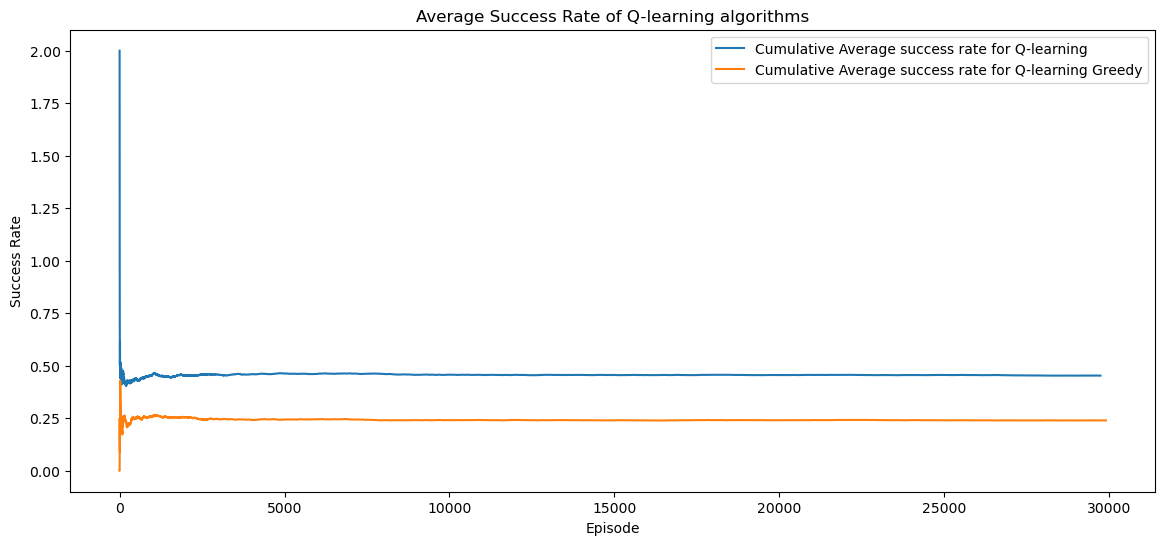

In [14]:
fig, axes = plt.subplots(figsize=(14, 6))
plt.plot(np.arange(len(rewards_q)), np.cumsum(rewards_q)/np.arange(len(rewards_q)), label="Cumulative Average success rate for Q-learning")
plt.plot(np.arange(len(rewards_q_greedy)), np.cumsum(rewards_q_greedy)/np.arange(len(rewards_q_greedy)), label="Cumulative Average success rate for Q-learning Greedy")

axes.set(xlabel='Episode', ylabel='Success Rate', title='Average Success Rate of Q-learning algorithms')
plt.legend()
plt.show()

Visualizing the learned Q Table

In [62]:
q_table = np.load("data/q_table.npy")

In [66]:
q_table[0]

array([2.49602315e-04, 3.46955736e-07, 3.84728288e-08, 2.27636339e-04])